In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from scipy.stats import mannwhitneyu

In [2]:
alpha_diversity_df = pd.read_csv("alpha_diversity_asv_metrics1.csv")

C:\Users\MEDV3721\AppData\Local\Temp\ipykernel_42216\1709767467.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(x=group_col, y=metric, data=df, inner=None, palette="Set2", cut=0)
C:\Users\MEDV3721\AppData\Local\Temp\ipykernel_42216\1709767467.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels, fontsize=20)


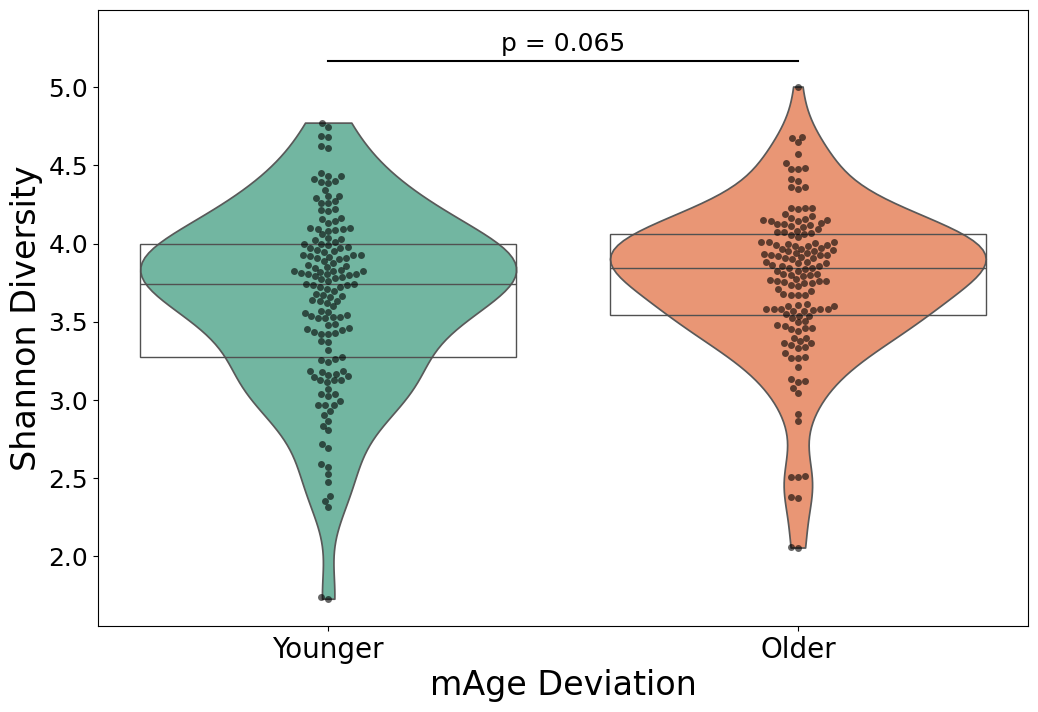

C:\Users\MEDV3721\AppData\Local\Temp\ipykernel_42216\1709767467.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(x=group_col, y=metric, data=df, inner=None, palette="Set2", cut=0)
C:\Users\MEDV3721\AppData\Local\Temp\ipykernel_42216\1709767467.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels, fontsize=20)


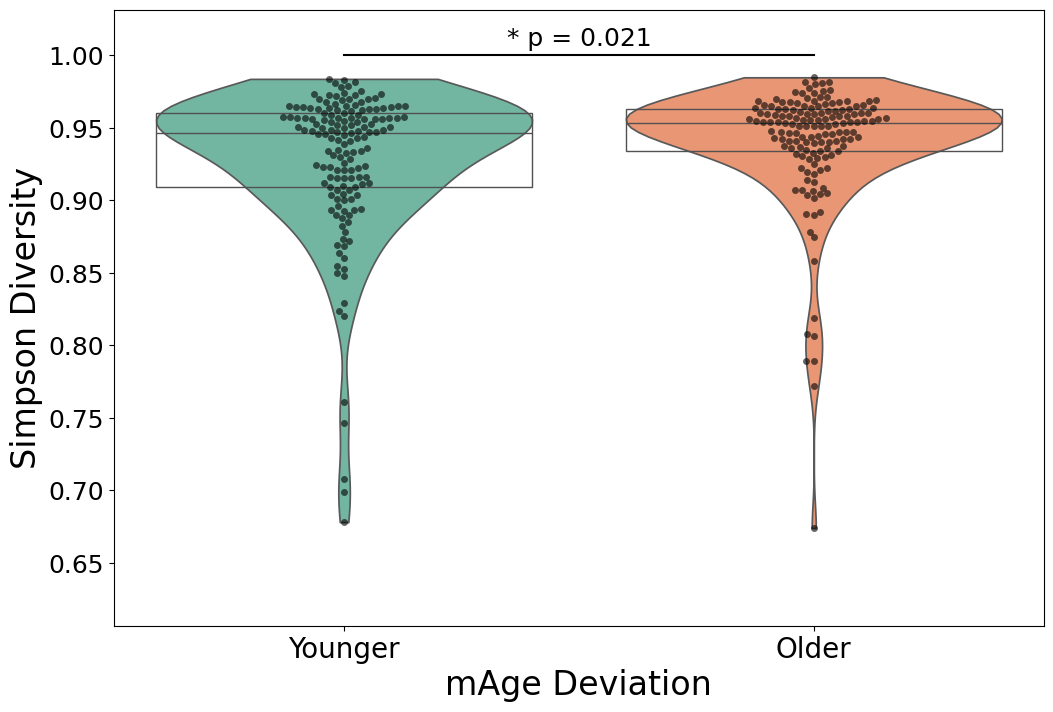

C:\Users\MEDV3721\AppData\Local\Temp\ipykernel_42216\1709767467.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(x=group_col, y=metric, data=df, inner=None, palette="Set2", cut=0)
C:\Users\MEDV3721\AppData\Local\Temp\ipykernel_42216\1709767467.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels, fontsize=20)


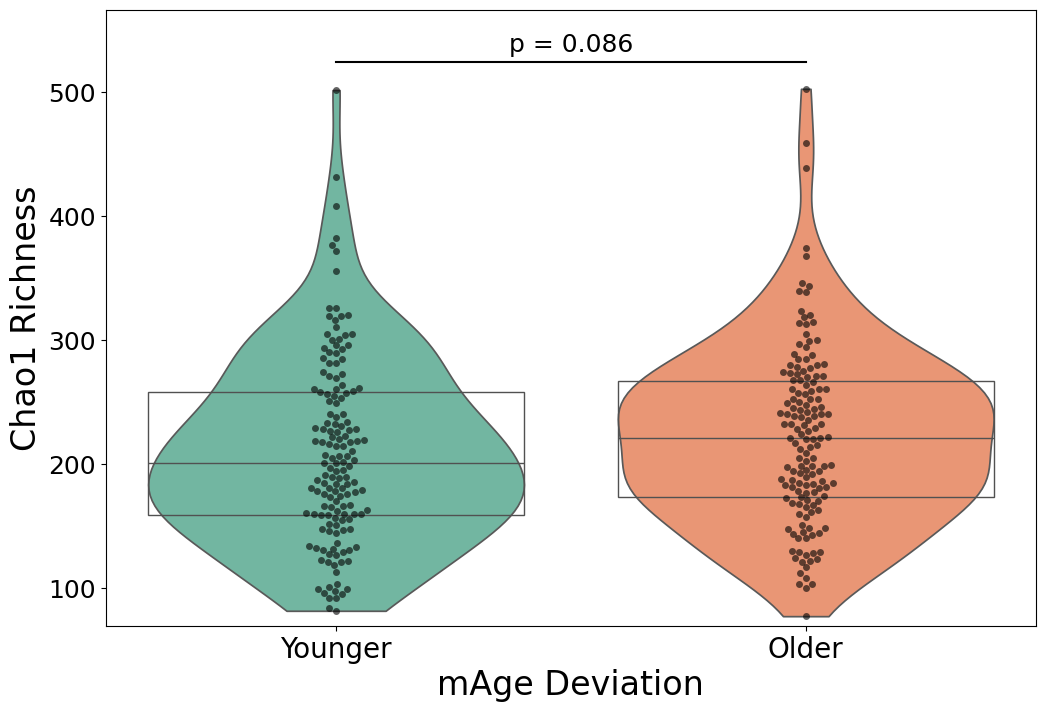

C:\Users\MEDV3721\AppData\Local\Temp\ipykernel_42216\1709767467.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(x=group_col, y=metric, data=df, inner=None, palette="Set2", cut=0)
C:\Users\MEDV3721\AppData\Local\Temp\ipykernel_42216\1709767467.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels, fontsize=20)


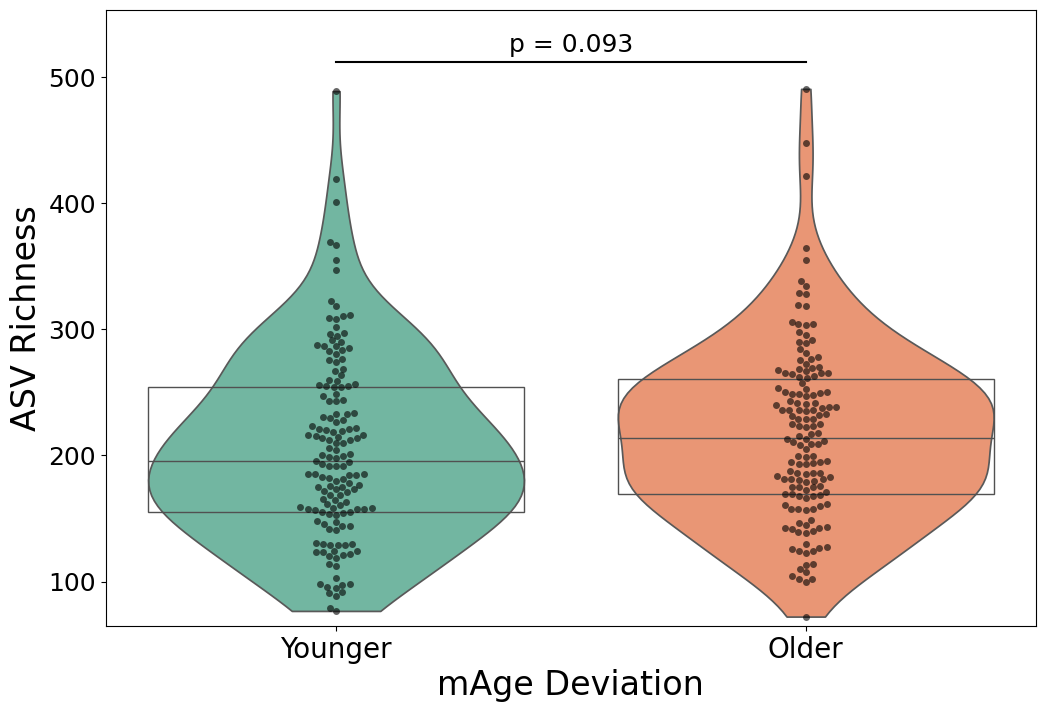

C:\Users\MEDV3721\AppData\Local\Temp\ipykernel_42216\1709767467.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(x=group_col, y=metric, data=df, inner=None, palette="Set2", cut=0)
C:\Users\MEDV3721\AppData\Local\Temp\ipykernel_42216\1709767467.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels, fontsize=20)


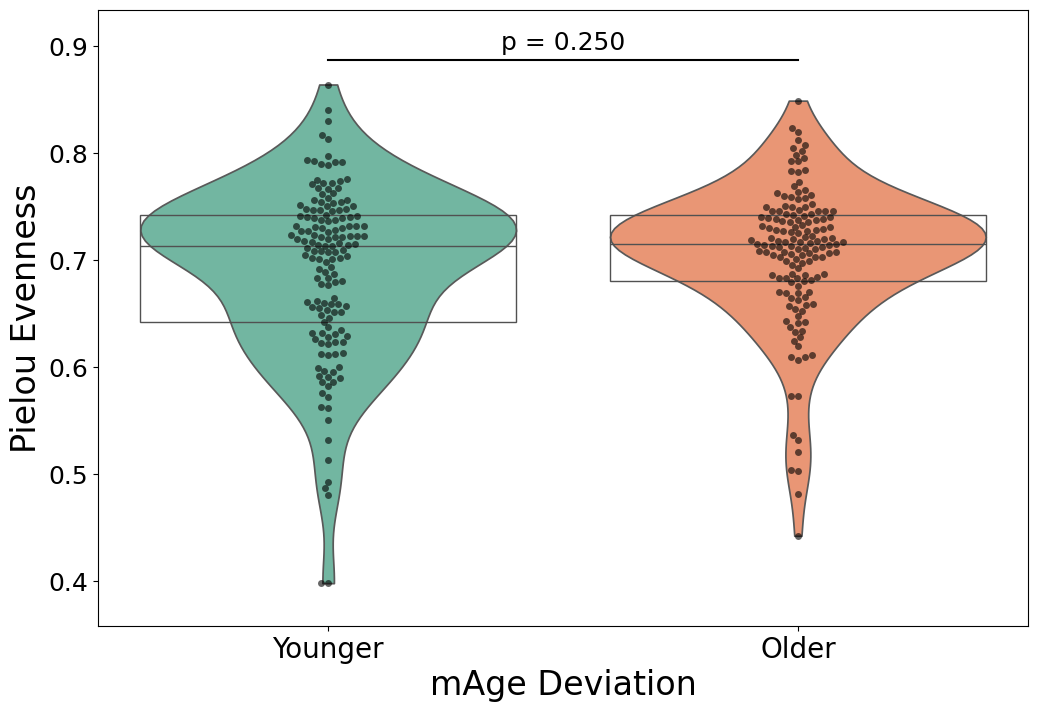

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

# Function to create violin plot with custom labels and group sizes
def plot_violin(metric, df, group_col='Group'):
    plt.figure(figsize=(12, 8))  # Adjusted figure size for publication standards
    
    # Calculate group sizes
    n_total = len(df)
    n_better = len(df[df[group_col] == 'Lower'])
    n_worse = len(df[df[group_col] == 'Higher'])
    
    # Update x-tick labels to include group sizes
    x_labels = [f"Younger", f"Older"]
    
    # Create the violin plot
    ax = sns.violinplot(x=group_col, y=metric, data=df, inner=None, palette="Set2", cut=0)
    
    # Add mean and standard deviation as a box plot inside the violin plot
    sns.boxplot(x=group_col, y=metric, data=df, showcaps=False, boxprops={'facecolor':'None'}, 
                showfliers=False, whiskerprops={'linewidth':0}, ax=ax)
    
    # Calculate Mann-Whitney U test
    group1 = df[df[group_col] == 'Better'][metric]
    group2 = df[df[group_col] == 'Worse'][metric]
    
    # Perform Mann-Whitney U test
    stat, p_val = mannwhitneyu(group1, group2, alternative='two-sided')

    if metric == 'OTU_Richness':
        # Annotate p-value and group sizes in the title
        #plt.title(f'ASV Richness', fontsize=24)
        plt.ylabel(f'ASV Richness', fontsize=24)
        plt.xlabel('mAge Deviation', fontsize=24)
    elif metric == "Chao1":
        # Annotate p-value and group sizes in the title
        #plt.title(f'Chao1 Richness', fontsize=24)
        plt.ylabel(f'Chao1 Richness', fontsize=24)
        plt.xlabel('mAge Deviation', fontsize=24)
    elif metric == "Pielou_Evenness":
        # Annotate p-value and group sizes in the title
        #plt.title(f'Pielou Evenness', fontsize=24)
        plt.ylabel(f'Pielou Evenness', fontsize=24)
        plt.xlabel('mAge Deviation', fontsize=24)
    else:
        # Annotate p-value and group sizes in the title
        #plt.title(f'{metric} Diversity', fontsize=24)
        plt.ylabel(f'{metric} Diversity', fontsize=24)
        plt.xlabel('mAge Deviation', fontsize=24)

    
    # Set the custom x-axis labels with larger font size
    ax.set_xticklabels(x_labels, fontsize=20)
    ax.tick_params(axis='y', labelsize=18)  # Adjust y-axis tick label size for clarity
    
    # Add scatter points for each sample
    sns.swarmplot(x=group_col, y=metric, data=df, color="k", alpha=0.6, ax=ax)
    
    # Add a horizontal line with p-value annotation above the violin plots
    max_val = max(df[metric])  # Find the maximum y-axis value for positioning the line
    min_val = min(df[metric])  # Find the minimum y-axis value
    
    y_pos = max_val + 0.05 * (max_val - min_val)  # Position the line slightly above the max value
    
    # Extend the y-axis limit to add more white space on top
    ax.set_ylim(min_val - (0.1 * min_val), y_pos + 0.1 * (max_val - min_val))  # Adds extra space only above the violins

    # Draw the line between the two groups
    ax.plot([0, 1], [y_pos, y_pos], color='black', linewidth=1.5)
    
    # Adjust p-value display based on significance
    significance_label = f"p = {p_val:.3f}"
    if p_val < 0.05:
        significance_label = f"* {significance_label}"
    
    # Add the p-value text slightly above the line to avoid overlap
    ax.text(0.5, y_pos + 0.01 * (max_val - min_val), significance_label, ha='center', va='bottom', color='black', fontsize=18)
    
    # Save the plot with high dpi for publication
    plt.savefig(f"{metric}_alpha_diversity1.png", format='png', dpi=600, bbox_inches='tight')
    
    # Display the plot
    plt.show()
    
    plt.close()

# Create and save violin plots for each diversity metric, including Pielou's Evenness
for metric in ['Shannon', 'Simpson', 'Chao1', 'OTU_Richness', 'Pielou_Evenness']:
    plot_violin(metric, alpha_diversity_df)


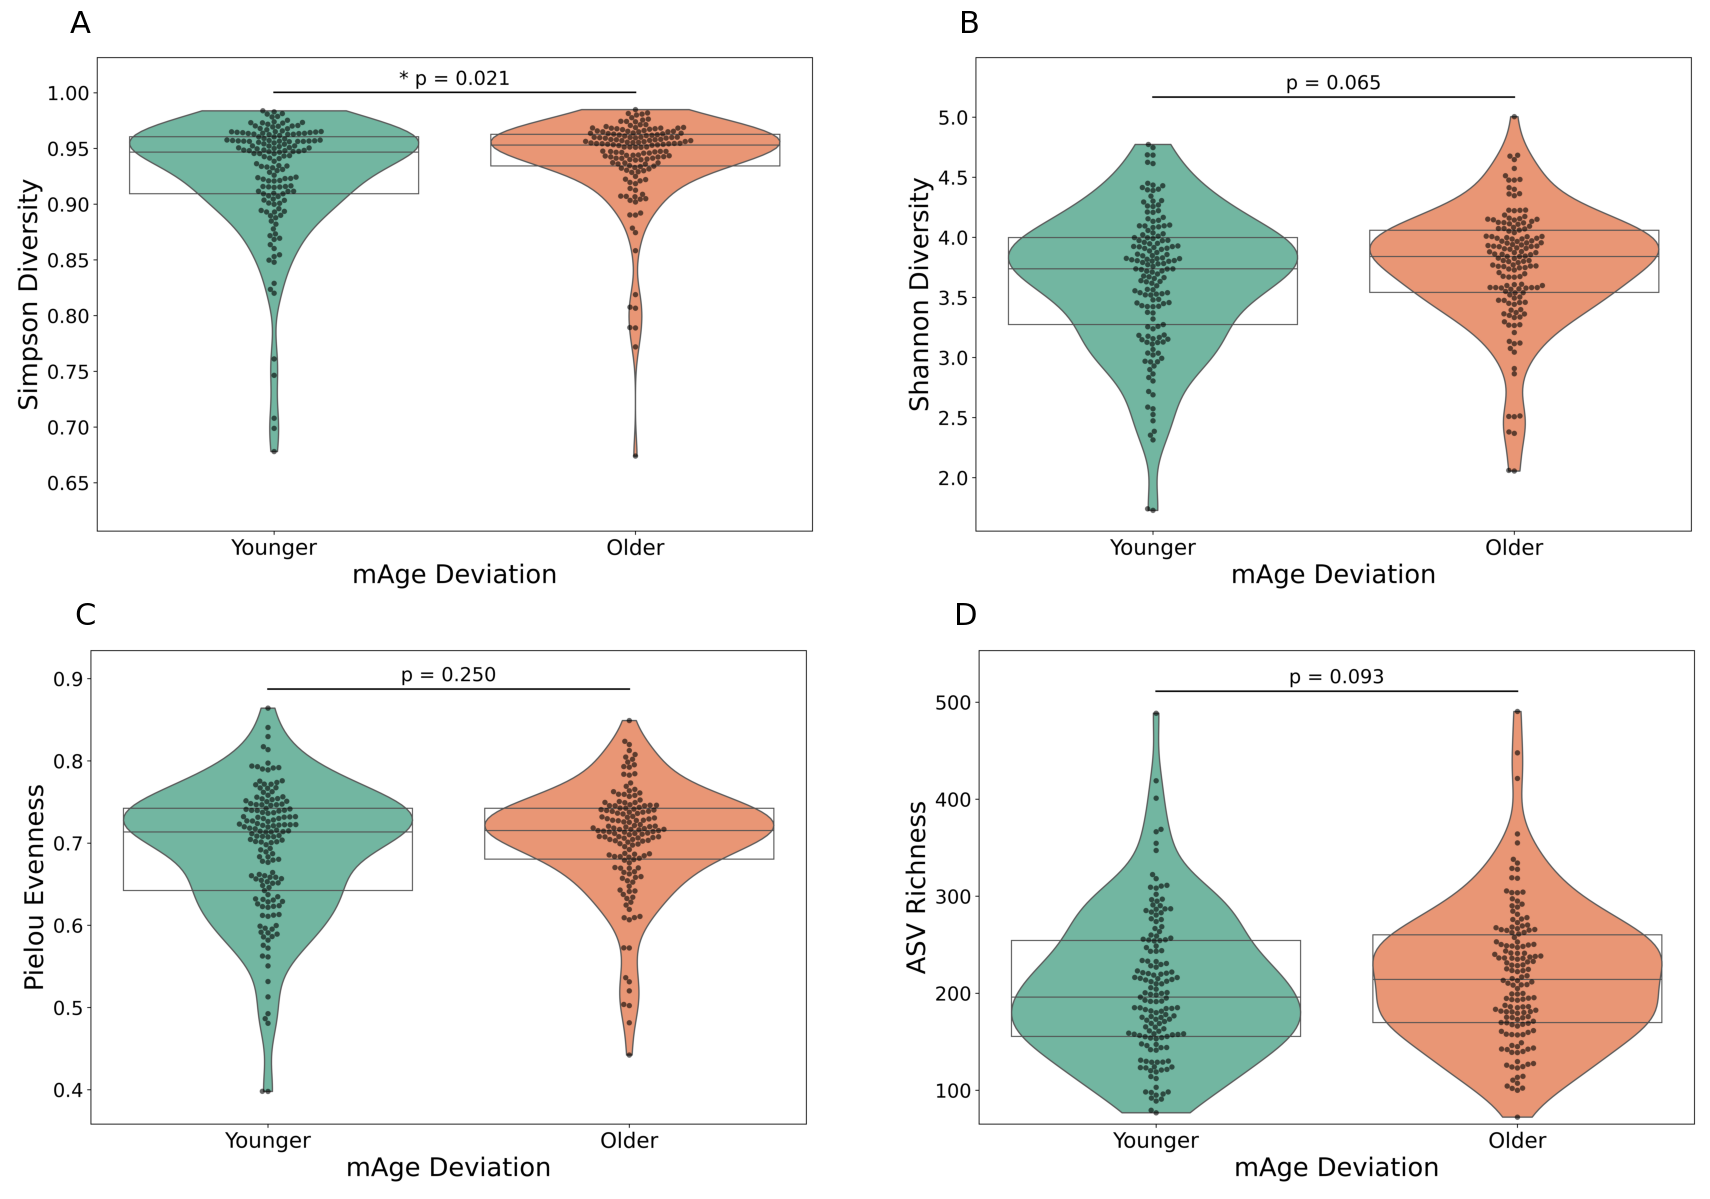

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the individual alpha diversity index images
simpson_img = mpimg.imread("Simpson_alpha_diversity1.png")
shannon_img = mpimg.imread("Shannon_alpha_diversity1.png")
pielou_img = mpimg.imread("Pielou_Evenness_alpha_diversity1.png")
richness_img = mpimg.imread("OTU_Richness_alpha_diversity1.png")

# Load the stacked bar plot and DA MA plot
#stacked_bar_img = mpimg.imread("../top_30_relative_abundance_by_group.png")
#da_maplot_img = mpimg.imread("DA_MAplot.png")

# Create a composite figure
fig, axes = plt.subplots(2, 2, figsize=(18, 12))  # Adjust size as needed for publication

# Plot each image in the specified subplot with titles and labels
images = [
    (simpson_img, "Simpson Diversity", "A"),
    (shannon_img, "Shannon Diversity", "B"),
    (pielou_img, "Pielou's Evenness", "C"),
    (richness_img, "Richness", "D"),
]

for ax, (img, title, label) in zip(axes.flat, images):
    ax.imshow(img)
    ax.axis('off')
    #ax.set_title(title, fontsize=16)
    ax.text(0.1, 1.075, label, transform=ax.transAxes,
            fontsize=22, fontweight='light', va='top', ha='right')

# Adjust layout for spacing and titles
plt.tight_layout()

# Save the composite figure with high resolution for publication
plt.savefig("composite_alpha_abundance_DA_plot2.png", format='png', dpi=600, bbox_inches='tight')

# Display the composite figure
plt.show()
